<a href="https://colab.research.google.com/github/MUHAMMADFAWWAZWIYOGA/DIF2130_A_25_2311532019/blob/main/Pratikum1/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES YANG DIPERLUKAN

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import joblib
import pickle


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler




In [ ]:
# prompt: KODE DIATAS MASIH BELUM LENGKAP LIBRARIES YANG DI MASUKAN MULDAI DARI MODE SELECTION LINEAR MODEL METRIC DAN DATA SET

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import joblib
import pickle
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import joblib
import pickle
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler



In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df =pd.DataFrame ( data= housing.data, columns=housing.feature_names)
df['med_house_val'] = housing.target

target=df['med_house_val']
input=df.drop(['med_house_val'], axis=1)
df.tail(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,med_house_val
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [5]:
df.describe()
df.info()
print ('DataFrame dimension',df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   med_house_val  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
DataFrame dimension (20640, 9)


DATA PREPOCESSING

bagi dataset menjadi 70% training dan 30% test

In [9]:
X_train,X_test,y_train,y_test = train_test_split(input, target, test_size=0.3, random_state = 1)
print(X_train.shape, X_train.shape)
print(y_train.shape, y_test.shape)

(14448, 8) (14448, 8)
(14448,) (6192,)


In [10]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print (X_test)

[[1.89659453e-01 7.45098039e-01 2.59249620e-02 ... 8.26699958e-04
  1.61530287e-01 5.94594595e-01]
 [1.01964111e-01 7.05882353e-01 2.93658328e-02 ... 1.49655077e-03
  4.50584485e-01 4.52452452e-01]
 [2.42293210e-01 8.82352941e-01 2.57625553e-02 ... 2.43712035e-03
  5.51540914e-01 1.88188188e-01]
 ...
 [1.43901463e-01 9.01960784e-01 2.71911561e-02 ... 1.63065424e-03
  5.92986185e-01 2.05205205e-01]
 [1.45508338e-01 2.35294118e-01 2.97484189e-02 ... 1.59782455e-03
  5.87672689e-01 2.06206206e-01]
 [8.33367816e-02 5.49019608e-01 1.45501245e-02 ... 1.74904890e-03
  1.65781084e-01 6.00600601e-01]]


In [12]:
from sklearn.linear_model import LinearRegression #Import LinearRegression
lr_model =LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [13]:
print (f'intercept: {lr_model.intercept_}')
print (f'slope: {lr_model.coef_}')

intercept: 3.721516132506502
slope: [  6.39513914   0.49408893 -14.78075919  20.98391128  -0.2003207
  -4.08551937  -3.98214561  -4.37460957]


MSE (Mean Squared Error)

MSE adalah rata-rata dari kuadrat selisih antara nilai aktual dan nilai predi

In [15]:
from sklearn.metrics import mean_squared_error
y_pred = lr_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=lr_model.score(X_test,y_test)
print ( f'mse:{mse}')
print (f'R2 :{r2}')

mse:0.5296293151408232
R2 :0.597142973735963


<function matplotlib.pyplot.show(close=None, block=None)>

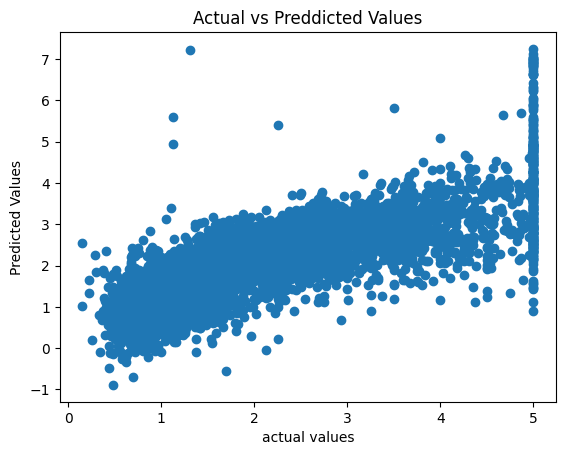

In [16]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Preddicted Values')
plt.show

PENYIMPANAN FILE DENGAN FORMAT SAV & PICKLE DUMP MENYIMPAN OBJEK KEDALAM FILE

In [17]:
import pickle

filename = 'Finalized_model.sav'
pickle.dump(lr_model, open(filename, 'wb'))